# IST664 - Homework 3

Originality assertion: All of the text and comments in this file are my original work (except for template items written by the instructor). All of the code in this file is my work, except where I give credit to another source. By adding my name below, I affirm this originality assertion.

*** My name: Benjamin Tisinger***


**Task 1: Read Sentence Pairs from Github**

It is a weird acronym, but the "Sentences Involving Compositional Knowledge" (SICK) dataset includes a large number of sentence pairs with various levels of similarity. Here's a link to a web page with more information about the data:
https://marcobaroni.org/composes/sick.html

When you review the data, you will notice a field where the options are ENTAILMENT, CONTRADICTION, or NEUTRAL. Textual entailment is when one sentence logically follows based on the meaning of another sentence. You can read more about textual entailment here: https://en.wikipedia.org/wiki/Textual_entailment

In [3]:
import pandas as pd

sick_data = pd.read_csv("SICK_train.txt" , sep='\t', on_bad_lines='skip', index_col=None)

# HW3T1A
# Add code to display the first few rows of data
#
sick_data.head()



,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL


In [4]:
# HW3T1B
# Add code that shows the number of variables and the number of rows in the dataset.
# Add some comments describing what each of the columns contains.
#

sick_data.info()
sick_data.shape[0]
sick_data.shape[1]

#4500 Rows
#5 Columns

#Column Pair_ID = Int64
#Columns sentence_A = object
#Columns sentence_B = object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pair_ID              4500 non-null   int64  
 1   sentence_A           4500 non-null   object 
 2   sentence_B           4500 non-null   object 
 3   relatedness_score    4500 non-null   float64
 4   entailment_judgment  4500 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 175.9+ KB


5

**Task 2: Add a Similarity Score to Each Row**

Use a pre-trained sentence embedding model to generate a similarity score for each sentence pair. To get started, here's some code from Lab 7:

In [5]:
# HW3T2A
# The first thing we will need is the library for loading sentence transformers
# This generates a lot of output, but should run pretty fast.
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [6]:
# HW3T2B
# Now load a pre-trained sentence transformer. There are hundreds to choose from.
# This downloads a lot of data to your virtual machine and takes half a minute or so.
from sentence_transformers import SentenceTransformer

# Here's a sentence transformer model that encodes a d=384 vector. See:
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# HW3T2C
# Here's an example of how we can put the sentence transformer to use
# by encoding the two sentences from the first row and computing a
# cosine similarity between them.
from sentence_transformers.util import cos_sim

show_row = 2

print(sick_data["sentence_A"][show_row])
print(sick_data["sentence_B"][show_row])
print(sick_data["entailment_judgment"][show_row])
a = model.encode([sick_data["sentence_A"][show_row]])
b = model.encode([sick_data["sentence_B"][show_row]])

cos_sim(a, b).tolist()[0][0] # The notation on the end extracts a scalar from the tensor object

The young boys are playing outdoors and the man is smiling nearby
The kids are playing outdoors near a man with a smile
ENTAILMENT


0.8005356192588806

In [8]:
# HW3T2D
# Add code to produce a similarity score for each sentence pair and insert the
# list into the Pandas dataframe as a new column. You can use the "insert" method
# on a Pandas df to add a column. Choose a sensible label for your new variable as
# you will need it later for the regression analysis.
#
# Note that if you process the whole dataset, it will take a couple of minutes
# to encode all 4500 of the sentences. You can subset the data down to 1000
# or 1500 rows if you prefer to shorten the run time.
#

sub_size = 1500
sick_subset = sick_data.iloc[:sub_size].copy()

embeddings_A = model.encode(sick_subset["sentence_A"].tolist(), convert_to_tensor=True)
embeddings_B = model.encode(sick_subset["sentence_B"].tolist(), convert_to_tensor=True)

similarities = cos_sim(embeddings_A, embeddings_B)
similarity_scores = [sim.item() for sim in similarities.diagonal()]

sick_subset.insert(loc=len(sick_subset.columns), column="semantic_similarity", value=similarity_scores)

print(sick_subset.head())

#Used Source https://www.phind.com/


   pair_ID                                         sentence_A  \
0        1  A group of kids is playing in a yard and an ol...   
1        2  A group of children is playing in the house an...   
2        3  The young boys are playing outdoors and the ma...   
3        5  The kids are playing outdoors near a man with ...   
4        9  The young boys are playing outdoors and the ma...   

                                          sentence_B  relatedness_score  \
0  A group of boys in a yard is playing and a man...                4.5   
1  A group of kids is playing in a yard and an ol...                3.2   
2  The kids are playing outdoors near a man with ...                4.7   
3  A group of kids is playing in a yard and an ol...                3.4   
4  A group of kids is playing in a yard and an ol...                3.7   

  entailment_judgment  semantic_similarity  
0             NEUTRAL             0.851040  
1             NEUTRAL             0.540574  
2          ENTAILMENT  

In [9]:
# HW3T2E
# Review a few rows of the modified Pandas df with the new column
#
sick_subset.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,semantic_similarity
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728


In [10]:
# HW3T2F
# Run and interpret a simple correlation between your new similarity score
# and the original relatedness_score column. The corr() method from Pandas
# (which is a method for columns) can do this.
#

correlation = sick_subset["relatedness_score"].corr(sick_subset["semantic_similarity"])
print(correlation)

0.8003475378944006


Add your interpretation of the correlation by replacing this text. Would you consider this value to be small? Large? Is it what you expected? Why?

In [11]:
#Strong Positive Relationship - Each Setence has a strong relationship with one-another

**Task 3: Create Dummy Codes for Entailment**

In this task after this one, you will produce a regression analysis that predicts the original relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment.

With linear regression we can use as predictors any combination of metric variables and binary codes. With a label like entailment_judgment, with three or more categories, we need to create dummy codes to represent the categories. To avoid collinearity, there should always be one less dummy code than the number of categories.

In [12]:
# HW3T3A
# Show the three types of entailment_judgment using set().
set(sick_subset["entailment_judgment"])

{'CONTRADICTION', 'ENTAILMENT', 'NEUTRAL'}

In [13]:
# HW3T3B
contra = [ int(ej == "CONTRADICTION") for ej in sick_subset["entailment_judgment"]]
entail = [ int(ej == "ENTAILMENT") for ej in sick_subset["entailment_judgment"]]

In [14]:
# HW3T3C
# Insert the two new dummy codes into your pandas df
#
sick_subset.insert(loc=len(sick_subset.columns), column="dummy_entail", value=entail)
sick_subset.insert(loc=len(sick_subset.columns), column="dummy_contra", value=contra)

In [15]:
# HW3T3D
# Review the newly modified df
#
sick_subset.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,semantic_similarity,dummy_entail,dummy_contra
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,1,0
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0


**Task 4: See if the root verbs match**

In HW2 you conducted some information extraction from sentences including locating the root verb. If the root verbs match on two sentences, that may indicate something about how related the sentences are. For this task you will create a list of dummy codes that indicate whether the two sentences in each pair use the same root verb.

In [16]:
# HW3T4A
import spacy # SpaCy will help us find roots
nlp = spacy.load("en_core_web_sm")

In [17]:
# HW3T4B
# Here's some demo code that shows how to fetch the roots
show_row = 5

print(sick_data["sentence_A"][show_row])
print(sick_data["sentence_B"][show_row])

doc1 = nlp(sick_data["sentence_A"][show_row])
doc2 = nlp(sick_data["sentence_B"][show_row])

list(doc1.sents)[0].root, list(doc2.sents)[0].root

Two dogs are fighting
Two dogs are wrestling and hugging


(fighting, wrestling)

In [18]:
# HW3T4C
# Here's a test that compares the two strings
list(doc1.sents)[0].root.text == list(doc2.sents)[0].root.text

False

In [19]:
# HW3T4D
# Write a loop that will perform the test on each pair of sentences and save the result in a list
#

root_match = []

for i in range(len(sick_subset)):
    doc1 = nlp(sick_subset["sentence_A"].iloc[i])
    doc2 = nlp(sick_subset["sentence_B"].iloc[i])

    root1 = list(doc1.sents)[0].root.text
    root2 = list(doc2.sents)[0].root.text

    root_match.append(root1 == root2)

#Used Source https://www.phind.com/


In [20]:
# HW3T4E
# Insert the new dummy code into your pandas df.
# Use the column name, "root_match", as shown in the example
#

sick_subset.insert(loc=len(sick_subset.columns), column="root_match", value=root_match)



In [21]:
# HW3T4F
# Display the pandas df
#

sick_subset.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,semantic_similarity,dummy_entail,dummy_contra,root_match
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0,True
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0,True
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,1,0,True
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0,True
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0,True


**Task 5: Run Regression Analysis to Predict relatedness_score**

Next, your job is to conduct a regression analysis where you predict relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment. The sklearn library has a linear regression model, but statsmodels.api produces nicer output.

In [22]:
# HW3T5A
# The sm.OLS() method does regression and once you have fitted the model
# the summary() method produces nice output with all the values needed to
# interpret regression results.
#
import statsmodels.api as sm
import statsmodels.formula.api as smf

# You can specify your regression model using a formula language, like this:
# results = smf.ols('relatedness_score ~ similarity + dummy_entail + dummy_contra + root_match', data=sick_data).fit()
# Of course, you may need to adjust the X-variable names depending upon the
# labels you used when you inserted them into the database.


In [23]:
output = smf.ols('relatedness_score ~ semantic_similarity + dummy_entail + dummy_contra + root_match', data=sick_subset).fit()

In [24]:
# HW3T5B
# Use the summary() method on your results object to show the regression output.

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      relatedness_score   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1044.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        15:09:06   Log-Likelihood:                -1079.3
No. Observations:                1500   AIC:                             2169.
Df Residuals:                    1495   BIC:                             2195.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6186      0.040     40.225      0.000       1.540       1.698
root_match[T.True]     -0.1075      0.029     -3.670      0.000      -0.165      -0.050
semantic_similarity     2.5606      0.068     37.751      0.000       2.428       2.694
dummy_entail            0.8058      0.036     22.136      0.000       0.734       0.877
dummy_contra            0.0872      0.039      2.261      0.024       0.012       0.163
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.454
Skew:                          -0.024   Prob(JB):                        0.797
Kurtosis:                       3.070   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

HW3T5C

Replace this text with an explanation of the regression output. Make sure to report on the values of the coefficients for the predictors (and the intercept). Also report and interpret the R-squared value. Is this a good predictive model?

In [25]:
#R Squared of 0.736
#Adjusted R Square of 0.736
#This is a Decent Model

**Task 6: Find the sentence with the largest error of prediction and the smallest error of prediction.**



In [26]:
# HW3T6A
# Use the predict() method on the results object to produce predicted scores
# for each row in your data frame. For the regression equation to work, you must
# supply all three of the X variables for each case. Pandas makes it
# easy to create a Pandas subset of columns, like this:
#
# predictors = sick_data[['similarity', 'dummy_entail', 'dummy_contra', 'root_match']]

predictors = sick_subset[['semantic_similarity', 'dummy_entail', 'dummy_contra', 'root_match']]
predicted_scores = output.predict(predictors)




In [38]:
sick_subset['predicted_score'] = predicted_scores
sick_subset.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,semantic_similarity,dummy_entail,dummy_contra,root_match,predicted_score
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0,True,3.690237
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0,True,2.895270
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,1,0,True,4.366683
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0,True,3.068005
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0,True,2.765077


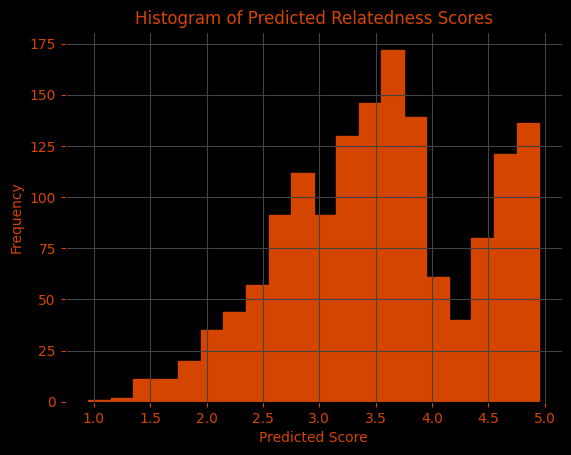

In [39]:
# HW3T6B
import matplotlib.pyplot as plt

#
# Show a histogram of predicted values from the previous block. Comment on
# why the range of the predicted values does or does not make sense.
#

syracuse_orange = '#D44500'

plt.figure(facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.hist(sick_subset['predicted_score'], bins=20, edgecolor=syracuse_orange, color=syracuse_orange)

plt.title('Histogram of Predicted Relatedness Scores', color=syracuse_orange)
plt.xlabel('Predicted Score', color=syracuse_orange)
plt.ylabel('Frequency', color=syracuse_orange)

ax.tick_params(axis='x', colors=syracuse_orange)
ax.tick_params(axis='y', colors=syracuse_orange)

plt.grid(True, color='#444444')

plt.show()

#Used Source https://www.phind.com/

#The Model is realtively realistic and the predictions are in Range.

In [40]:
# HW3T6C
# Compute a squared error value for each row of your data frame. This is easy:
# subtract the predicted value from the actual value (i.e., relatedness_score)
# and square the result. You can use a for loop or a list comprehension.

# Hint 1:
# Python's built-in zip() function allows you to bundle two vectors of data
# together into a list of tuples.
# Hint 2:
# When extracting data from a Pandas column, sometimes you must use the
# tolist() method to get the data into a structure that can be used for
# functions like zip().


actual_values = sick_subset['relatedness_score'].tolist()
predicted_values = sick_subset['predicted_score'].tolist()

squared_errors = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]

sick_subset['squared_error'] = squared_errors

sick_subset.head()


,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,semantic_similarity,dummy_entail,dummy_contra,root_match,predicted_score,squared_error
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0,True,3.690237,0.655715
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0,True,2.895270,0.092860
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,1,0,True,4.366683,0.111100
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0,True,3.068005,0.110221
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0,True,2.765077,0.874080


In [41]:
# HW3T6D
import numpy as np
# Use np.argmin() to find the index of the row in the Pandas dataset with the
# smallest squared error of prediction

min_error_index = np.argmin(sick_subset['squared_error'])
min_error_index


np.int64(54)

In [42]:
# HW3T6E
# Use np.argmax() to find the index of the row with the largest squared error

max_error_index = np.argmax(sick_subset['squared_error'])
max_error_index

np.int64(1269)

In [43]:
# HW3T6F
# Display the Pandas data from the row with the worst prediction. Note that
# the iloc() method allows you to select a particular row.


max_error_row = sick_subset.iloc[max_error_index]
max_error_row

,1269
pair_ID,2864
sentence_A,Nobody is riding a bike
sentence_B,Two people are riding a bike
relatedness_score,4.3
entailment_judgment,CONTRADICTION
semantic_similarity,0.418707
dummy_entail,0
dummy_contra,1
root_match,True
predicted_score,2.670464


In [44]:
# HW3T6G
# Display the Pandas data from the row with the worst prediction

min_error_row = sick_subset.iloc[min_error_index]
min_error_row


,54
pair_ID,129
sentence_A,An old man is sitting in a field
sentence_B,A man is sitting in a field
relatedness_score,4.4
entailment_judgment,ENTAILMENT
semantic_similarity,0.813854
dummy_entail,1
dummy_contra,0
root_match,True
predicted_score,4.400786


HW3T6H

Replace this text with an explanation of why the argmin() case was "easy" to predict and the argmax() case was "hard" to predict. This explanation should consider the semantic content of the sentences in reference to the relatedness_score developed by the experts.

In [ ]:
#The Min was easy to predcit becauase the setences are almost identical
#The Max was hard to predict because It includes the word Nobody while the 2nd setence says Two people are riding the bike

**Task 7: Write your own two contradictory sentences and predict the relatedness score**

In [33]:
# HW3T7A
# Replace these empty strings with your own sentences
test_sentenceA = "The Sky is blue and the clouds are out"
test_sentenceB = "It is thunderstorming with heavy rain and clouds"

In [45]:
# HW3T7B
# Encode the sentences into vectors as was demonstrated for task 2.

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

vector1 = model.encode([test_sentenceA])
vector2 = model.encode([test_sentenceB])


In [46]:
# HW3T7C
# Compute the cosine similarity between the two vectors.

from sentence_transformers.util import cos_sim
similarity_score = cos_sim(vector1, vector2).tolist()[0][0]
similarity_score

0.9999998211860657

In [49]:
# HW3T7D
# You may have used the formula interface for fitting your regression model
# with smf.ols(). If that's true, the easiest way to get a prediction for a
# novel case is to build a one-row Pandas dataframe and enter the X variables
# you need to make the prediction. The next two lines of commented code
# provide an exmaple of this technique:
# temp_df = pd.DataFrame(columns=['similarity', 'dummy_entail', 'dummy_contra', 'root_match'])
# temp_df.loc[0] = [0.80, 0, 0] # You can include whatever X data you want in place of these three values
#

temp_df = pd.DataFrame(columns=['semantic_similarity', 'dummy_entail', 'dummy_contra', 'root_match'])
temp_df.loc[0] = [similarity_score, 0, 0, 0]


In [50]:
# HW3T7E
# Use the predict() method on your regression output object to make one
# prediction of relatedness_score using the one-row Pandas dataframe from
# the previous step.
#

prediction = output.predict(temp_df)
prediction

,0
0,4.179165


HW3T7F

Replace this text with an interpretation of the output score from the prediction based on your two sentences.

In [ ]:
#Shows there is some correlation - From using the Words Clouds - But the 4.17 Shows a low correlation

HWCC

Don't forget to write a concluding comment describing your findings. Provide an overview of your findings from the tasks you accomplished above. How well were you able to predict the relatedness score from the other variables? Did entailment or contradiction work as predictors and what does each coefficient say about our ability to predict relatedness scores? Would it be helpful to know something about entailment if we are trying to understand paraphrases? Why do we care about entailment in the context of an application such as chat?

In [ ]:
#We were able to predict some findings with close scores due to close setence structure. However there are some setences that are not common and were harder to predict.
#It would be important to have the entailment especially for understanding paraphrases.